# CALLTRONIX DATA ANALYSIS AND VISUALIZATION

In this notebook we will analyze calls made across different departments.

We will create new columns to help us to uncover further insights from the data and answer interesting questions.

## Importing libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading dataset

In [6]:
df = pd.read_csv('raw_data.csv')

In [7]:
df.head(1)

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,VO,Non-Contact,Number Busy,NaN,1 May 2022,Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reomove the extra colunmns with no inputs to our analysis

In [10]:
df = df.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'])

In [11]:
df.head(2)

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status
0,VO,Non-Contact,Number Busy,NaN,1 May 2022,Open
1,VO,Inquiry,Prescription,Pharm,1 May 2022,Open


In [12]:
df.tail(3)

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status
13512,NaN,NaN,NaN,NaN,NaN,NaN
13513,NaN,NaN,NaN,NaN,NaN,NaN
13514,NaN,NaN,NaN,NaN,NaN,NaN


Drop the extra rows in the dataset with no inputs

In [13]:
df =  df.drop(df.index[13474:])

In [14]:
df.tail(5)

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status
13469,VB,Inquiry,Tests,LAB,17 May 2022,Open
13470,VO,Follow-up,Tests,LAB,17 May 2022,Open
13471,VB,Request,Tests,LAB,17 May 2022,Open
13472,VO,Follow-up,Tests,LAB,17 May 2022,Open
13473,VB,Inquiry,Availability of doctors,DOM,17 May 2022,Open


**The dataset contains categorical variables and one date column so bar plots will be the most efficient to use in our analysis**

In [651]:
df.shape

(13474, 6)

Ther Dataset has 137474 rows and 6 columns

Data information

In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13474 entries, 0 to 13473
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Issue Source    13474 non-null  object
 1   Issue Category  13474 non-null  object
 2   Disposition     13474 non-null  object
 3   Department      11159 non-null  object
 4   Date            13474 non-null  object
 5   Ticket Status   13473 non-null  object
dtypes: object(6)
memory usage: 736.9+ KB


Checking for missing values

In [653]:
df.isnull().sum()

Issue Source         0
Issue Category       0
Disposition          0
Department        2315
Date                 0
Ticket Status        1
dtype: int64

Checking the count of unique input names in the columns

In [654]:
df.nunique()

Issue Source       4
Issue Category     6
Disposition       45
Department        23
Date              17
Ticket Status      4
dtype: int64

**visualize missing values**

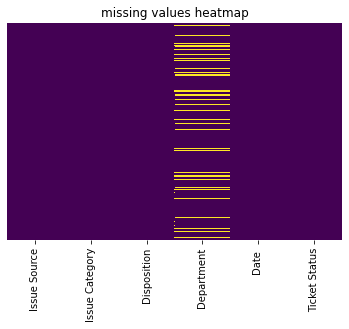

In [655]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('missing values heatmap');

lets create a copy of the data with missing values. 
Maybe we can discover some insights from it before we drop them since most of the missing values
are in the Departmental area.

### creating new columns

### Generating dates for the calls


In [656]:
df['day_of_the_week'] = pd.to_datetime(df['Date ']).dt.day_name()
df['day_of_the_month'] = pd.to_datetime(df['Date ']).dt.date

# lets analyze the calls

**first we create a copy which will contain the missing values in the department**

In [657]:
df_missing = df.copy()

## Total calls made

In [658]:
total = df_missing['Disposition'].value_counts().sum()
print('Total calls made were:', total)

Total calls made were: 13474


## lets get a count of each call made

In [659]:
df_missing['Disposition'].value_counts()

Availability of doctors         3017
Appointment Clarification       2379
No Answer                       1487
Appointment Booking             1362
Tests                            534
Disconnected                     455
Vaccination Availability         424
Service Available                380
Lab Results                      376
Walk-in                          373
Medical report                   300
availability of drugs            241
Operating Hours                  214
Housekeeping                     211
Number Busy                      181
Pricing                          178
Silent Call                      170
Admission                        149
Appointment Re-schedule          140
Purchasing and Supplies          120
Corporate Approval               115
Appointment cancellation          85
Patient Transfer                  62
Visiting Hours                    60
Prescription                      59
Security                          58
Referral                          53
R

**Visualizing the count**

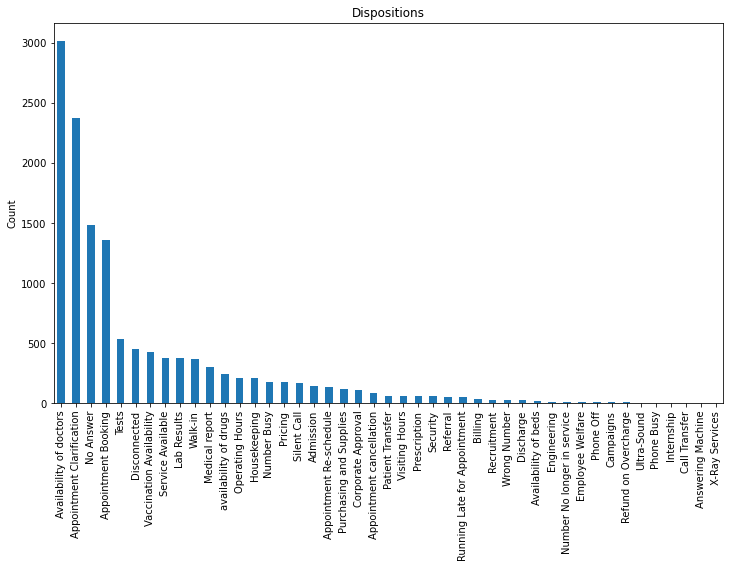

In [670]:
plt.figure(figsize=(12,7))
plt.title('Dispositions')
df_missing['Disposition'].value_counts().plot(kind='bar')
plt.ylabel('Count');

 **From the above observation we can see that:**
 
 Most calls were made seeking availability of doctors.
 
 And it seems also alot of calls received no answer **!!!**
 
 only one call was made for X_ray Services 
 
 

**I'm really interested in the calls that received no answer**

lets mask them out and see

**Why they had no answer**

In [661]:
df_no_answer = df_missing[df_missing['Disposition'] == 'No Answer']

In [662]:
print("Total Calls that received no answer were: ", df_no_answer.shape[0])

Total Calls that received no answer were:  1487


In [663]:
df_no_answer.nunique()

Issue Source         2
Issue Category       1
Disposition          1
Department           9
Date                17
Ticket Status        4
day_of_the_week      7
day_of_the_month    17
dtype: int64

### Day of the week on which the calls that received no answer were made

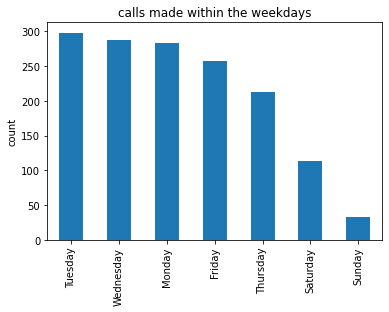

In [671]:
df_no_answer['day_of_the_week'].value_counts().plot(kind='bar')
plt.title('calls made within the weekdays')
plt.ylabel('count');

**Most calls that received no answer were made on tuesday and were least on saturday and sunday** 

Dates in which no_answer calls were made

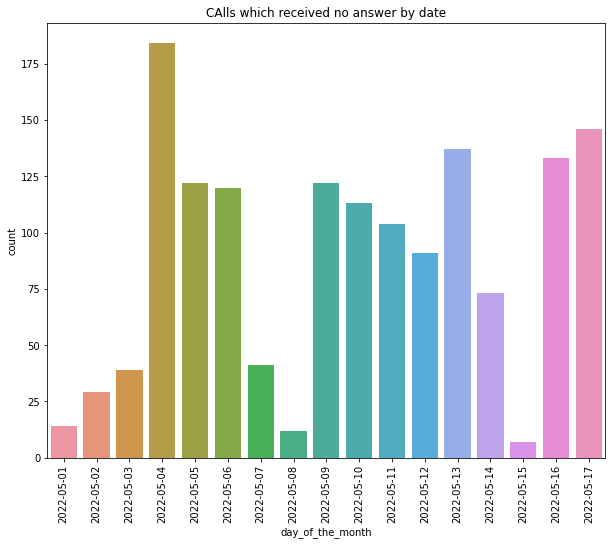

In [666]:
plt.figure(figsize=(10,8))
sns.countplot(x='day_of_the_month', data =df_no_answer)
plt.title('CAlls which received no answer by date')
plt.xticks(rotation=90);

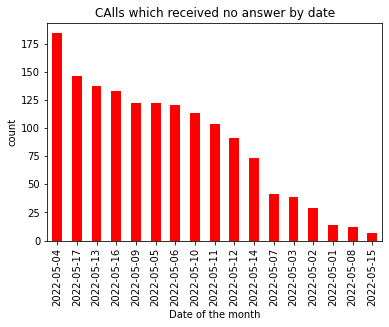

In [672]:
#sorted
df_no_answer['day_of_the_month'].value_counts().plot(kind='bar',color='red')
plt.title('CAlls which received no answer by date')
plt.xlabel('Date of the month')
plt.ylabel('count')
plt.show()

most calls that received no answer were made on 4th

In [377]:
df_no_answer['Issue Category'].value_counts()

Non-Contact    1487
Name: Issue Category, dtype: int64

It seems all the calls that received no answer the callers had the same issue. The issue is non-contact

lets look at the source

In [448]:
df_no_answer['Issue Source'].value_counts()

VO    1444
VB      43
Name: Issue Source, dtype: int64

most calls that received no answer there issue sorce where VO and VB. VO being 1444 and VB 43

visualizing the result

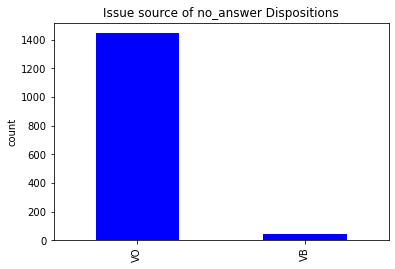

In [675]:
df_no_answer['Issue Source'].value_counts().plot(kind='bar',color='blue')
plt.title('Issue source of no_answer Dispositions')
plt.ylabel('count');

Lets look at there ticket status

In [454]:
df_no_answer['Ticket Status'].value_counts()

Closed        1458
Open            22
Unresolved       4
Resolved         3
Name: Ticket Status, dtype: int64

Most tickets that received no answer where closed 
while open, unresolved and resolved tickets where fewer in number

visual representation

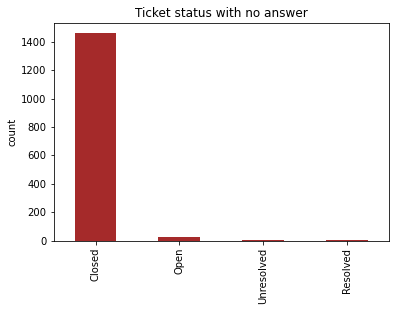

In [676]:
df_no_answer['Ticket Status'].value_counts().plot(kind='bar',color='brown');
plt.title('Ticket status with no answer')
plt.ylabel('count');

### Departments that gave no answer

In [456]:
df_no_answer['Department'].value_counts()

DOM                 7
Radio               5
Pharm               4
Operation           4
LAB                 3
Paedi               2
Non-Ward            2
Non-Med             1
HAEMATO-ONCOLOGY    1
Name: Department, dtype: int64

DOM department did not give answers to 7 callers. Non-med and Haemato-oncology department did not answer 1 caller each

visual representation

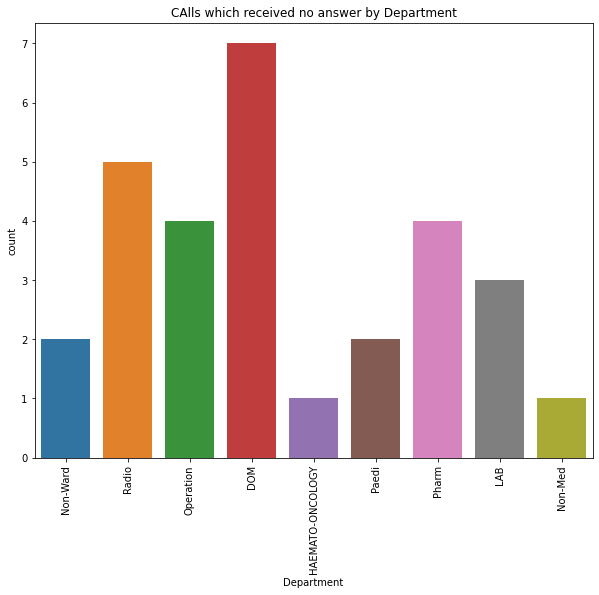

In [609]:
plt.figure(figsize=(10,8))
sns.countplot(x='Department', data =df_no_answer)
plt.title('CAlls which received no answer by Department')
plt.xticks(rotation=90);

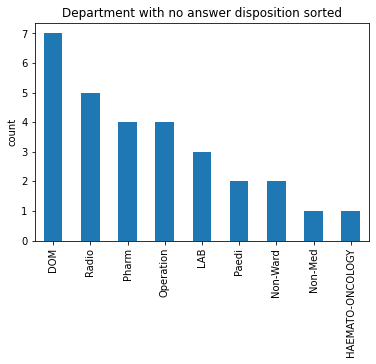

In [677]:
#sorted in pandas
df_no_answer['Department'].value_counts().plot(kind='bar')
plt.title('Department with no answer disposition sorted')
plt.ylabel('count');

DOM is the leading department in giving no_answer followed by Radio

## Now we drop the rows with null values
    
### But before we drop the rows lets look at the other dispositions that produced null values in the department so as not to loose any useful information


**we will use the df_missing data that we created as a copy**

Getting the count of departments

In [324]:
df_missing['Department'].value_counts()

DOM                        2608
Operation                  1454
Radio                      1215
OBS/GYNAE                  1141
LAB                         923
Paedi                       852
Pharm                       735
Non-Med                     473
OUTREACH                    463
Non-Ward                    233
HAEMATO-ONCOLOGY            201
PHYSIOTHERAPY               194
FMC                         158
FINANCE                     158
CASUALTY                    115
ANAESTHESIA                  69
HUMAN RESOURCE               46
FAMILY MEDICINE              35
PROCEDURES                   34
UNIVERSITY                   28
MARKETING                    11
THEATRE                      10
OBSTETRIC & GYNAECOLOGY       3
Name: Department, dtype: int64

Counting the number of dispositions with respect to Department

In [300]:
count = df_missing.groupby('Disposition').count()['Department'].sort_values(ascending = False)
count

Disposition
Availability of doctors         3017
Appointment Clarification       2379
Appointment Booking             1362
Tests                            534
Vaccination Availability         424
Service Available                380
Lab Results                      376
Walk-in                          373
Medical report                   300
availability of drugs            241
Operating Hours                  214
Housekeeping                     211
Pricing                          178
Admission                        149
Appointment Re-schedule          140
Purchasing and Supplies          120
Corporate Approval               115
Appointment cancellation          85
Patient Transfer                  62
Visiting Hours                    60
Prescription                      59
Security                          58
Referral                          53
Running Late for Appointment      52
Billing                           34
Recruitment                       32
No Answer                 

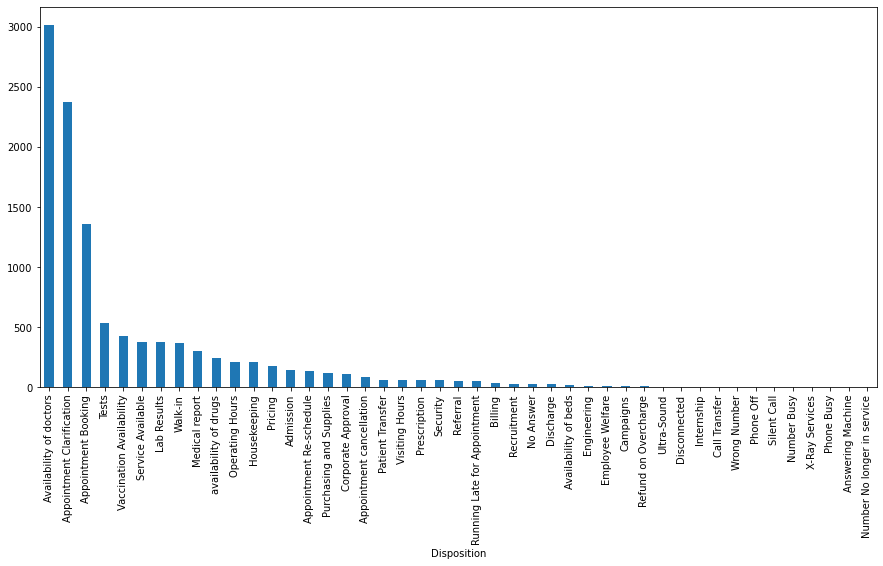

In [303]:
plt.figure(figsize=(15,7))
count.plot(kind='bar');

### Possible deductions

From the data their is no department dealing with : 'Phone Busy', 'Answering Machine' and 'Number No longer in service'.
Which makes total sense.

phone being busy means the department was on another call, answering machine maybe receives only
textual messages and Number no longer in services the department being called changed the phone number.

we can pull each one of the columns out that produced null values in the department and and see the issue.

Phone Busy

In [313]:
df_missing[df_missing['Disposition'] == 'Phone Busy']

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status
2822,VO,Non-Contact,Phone Busy,NaN,5 May 2022,Closed
3144,VO,Non-Contact,Phone Busy,NaN,5 May 2022,Closed
4175,VO,Non-Contact,Phone Busy,NaN,6 May 2022,Closed
11039,VO,Non-Contact,Phone Busy,NaN,15 May 2022,Closed
11401,VO,Non-Contact,Phone Busy,NaN,16 May 2022,Closed


 Obviously the department has null values 

It seems that phone busy is duplicated in other columns if it has Nans in the department except on the dates columns

So dropping rows with nans will also drop the duplicates

In [314]:
df_missing[df_missing['Disposition'] == 'Answering Machine']

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status
272,VO,Non-Contact,Answering Machine,NaN,2 May 2022,Closed
7381,VO,Non-Contact,Answering Machine,NaN,10 May 2022,Closed


Answering Machine

In [315]:
df_missing[df_missing['Disposition'] == 'Answering Machine']

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status


Phone Off

In [440]:
df_missing[df_missing['Disposition'] == 'Phone Off']

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status,day_of_the_week,day_of_the_month
276,VO,Non-Contact,Phone Off,NaN,2 May 2022,Closed,Monday,2022-05-02
598,VO,Non-Contact,Phone Off,NaN,2 May 2022,Closed,Monday,2022-05-02
760,VB,Non-Contact,Phone Off,DOM,3 May 2022,Closed,Tuesday,2022-05-03
1337,VO,Non-Contact,Phone Off,NaN,4 May 2022,Closed,Wednesday,2022-05-04
1388,VO,Non-Contact,Phone Off,NaN,4 May 2022,Closed,Wednesday,2022-05-04
1757,VO,Non-Contact,Phone Off,NaN,4 May 2022,Closed,Wednesday,2022-05-04
2530,VO,Non-Contact,Phone Off,NaN,5 May 2022,Closed,Thursday,2022-05-05
2565,VO,Non-Contact,Phone Off,NaN,5 May 2022,Closed,Thursday,2022-05-05
3321,VO,Non-Contact,Phone Off,NaN,5 May 2022,Closed,Thursday,2022-05-05
3642,VO,Non-Contact,Phone Off,NaN,6 May 2022,Closed,Friday,2022-05-06


In [458]:
df_missing[df_missing['Disposition'] == 'Phone Off']['Department'].value_counts()

DOM    1
Name: Department, dtype: int64

The DOM department there phone was off on 3 may 2022, on a Tuesday

Departments where number was busy

In [457]:
df_missing[df_missing['Disposition'] == 'Number Busy']['Department'].value_counts()

Non-Med    1
Name: Department, dtype: int64

Only non-med department there number was busy once

Departments in which calls where disconnected

In [479]:
disconnected_calls = df_missing[df_missing['Disposition'] == 'Disconnected']['Department'].value_counts()
disconnected_calls

DOM           2
Radio         2
Non-Med       1
Operation     1
UNIVERSITY    1
Name: Department, dtype: int64

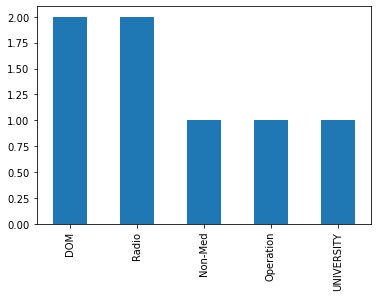

In [478]:
disconnected_calls.plot(kind='bar');

## we can now drop rows with nan

**Drop rows with null values**

In [678]:
df = df.dropna(axis=0)

In [679]:
df.isnull().sum()

Issue Source        0
Issue Category      0
Disposition         0
Department          0
Date                0
Ticket Status       0
day_of_the_week     0
day_of_the_month    0
dtype: int64

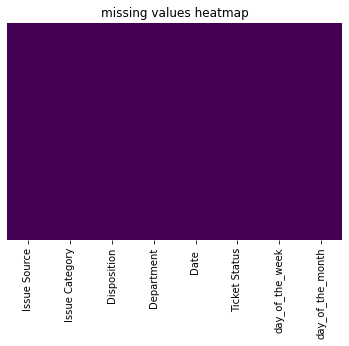

In [681]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');
plt.title('missing values heatmap');

## Now that our data is clean we can get a gist of it.

In [385]:
df.shape

(11158, 8)

In [408]:
df.head(1)

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status,day_of_the_week,day_of_the_month
1,VO,Inquiry,Prescription,Pharm,1 May 2022,Open,Sunday,2022-05-01


# Deep Dive into Calls Made 

### Calls made per day through out the month

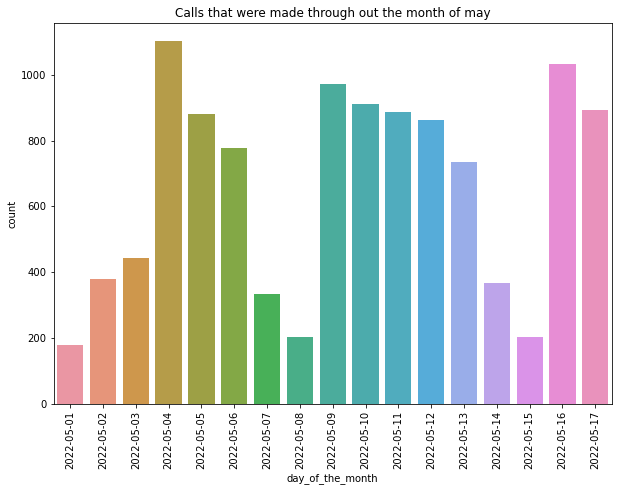

In [611]:
plt.figure(figsize = (10,7))
sns.countplot(x='day_of_the_month', data =df)
plt.title('Calls that were made through out the month of may')
plt.xticks(rotation=90);

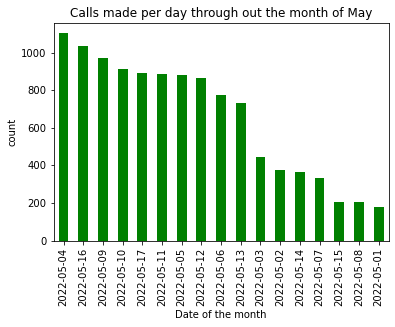

In [613]:
#sorted
df['day_of_the_month'].value_counts(sort = True).plot(kind='bar',color='green')
plt.title('Calls made per day through out the month of May')
plt.xlabel('Date of the month')
plt.ylabel('count')
plt.show()

**Most calls were made on 4th and while few calls were made on 1st of May**

### Total Calls made within the weekdays

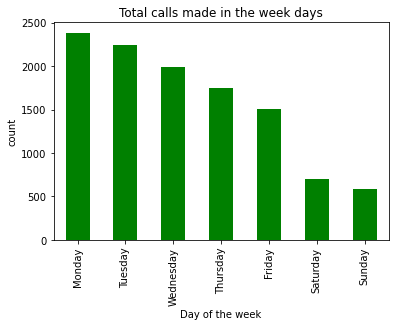

In [612]:
df['day_of_the_week'].value_counts().plot(kind='bar',color='green')
plt.title('Total calls made in the week days')
plt.xlabel('Day of the week')
plt.ylabel('count')
plt.show()

**From the Data most calls are made on weekdays and they are least on weekends**

## Getting the count of the unique values

In [394]:
columns = ['Issue Source', 'Issue Category', 'Department',
       'Ticket Status']

for i in columns:
    print(i, '-->')
    print()
    print(df[i].value_counts())
    print('---------------------------------')

Issue Source -->

VB    9268
VO    1888
Em       1
SM       1
Name: Issue Source, dtype: int64
---------------------------------
Issue Category -->

Request        5540
Inquiry        5353
Follow-up       162
Feedback         43
Non-Contact      41
Complaint        19
Name: Issue Category, dtype: int64
---------------------------------
Department -->

DOM                        2608
Operation                  1454
Radio                      1215
OBS/GYNAE                  1141
LAB                         922
Paedi                       852
Pharm                       735
Non-Med                     473
OUTREACH                    463
Non-Ward                    233
HAEMATO-ONCOLOGY            201
PHYSIOTHERAPY               194
FMC                         158
FINANCE                     158
CASUALTY                    115
ANAESTHESIA                  69
HUMAN RESOURCE               46
FAMILY MEDICINE              35
PROCEDURES                   34
UNIVERSITY                   28
MARKET

## Lets visualize unique values of each column separately

**lets start with departments**

calls made to the departments

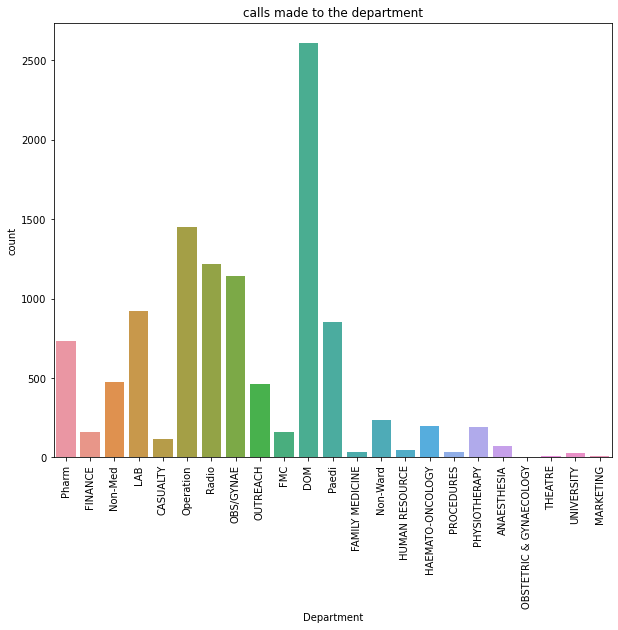

In [614]:
plt.figure(figsize = (10,8))
sns.countplot(x='Department', data =df)
plt.title('calls made to the department')
plt.xticks(rotation=90);

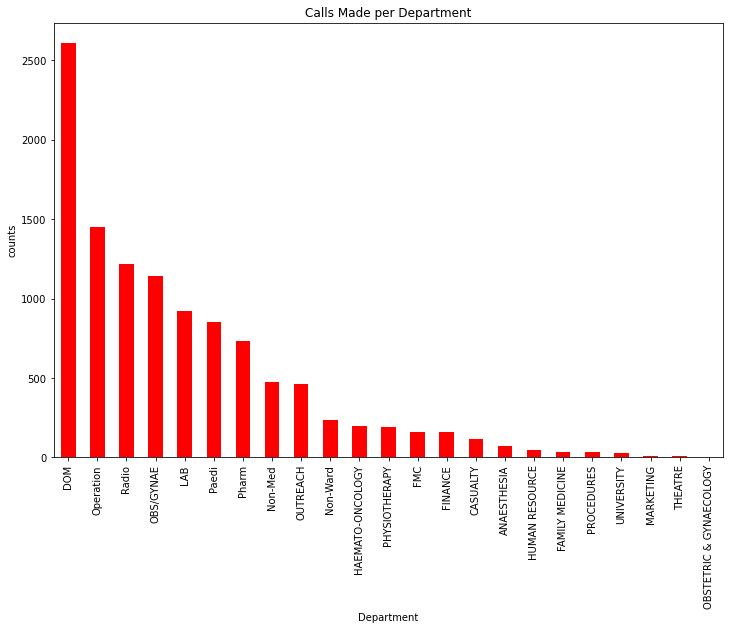

In [436]:
#sorted
plt.figure(figsize=(12,8))
df['Department'].value_counts().plot(kind='bar',color='red')
plt.title('Calls Made per Department')
plt.ylabel('counts')
plt.xlabel('Department');

DOM department receives most calls

lets see the dispositions in DOM

In [466]:
df_dom = df.query('Department == "DOM"')

In [467]:
df_dom.head()

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status,day_of_the_week,day_of_the_month
29,VB,Inquiry,Appointment Booking,DOM,1 May 2022,Open,Sunday,2022-05-01
39,VB,Inquiry,Availability of doctors,DOM,1 May 2022,Open,Sunday,2022-05-01
50,VB,Request,Availability of doctors,DOM,1 May 2022,Open,Sunday,2022-05-01
55,VB,Request,Appointment Booking,DOM,1 May 2022,Open,Sunday,2022-05-01
92,VB,Inquiry,Appointment Booking,DOM,1 May 2022,Open,Sunday,2022-05-01


In [468]:
df_dom['Disposition'].value_counts()

Availability of doctors         1360
Appointment Booking              478
Appointment Clarification        462
Walk-in                          182
Appointment Re-schedule           35
Appointment cancellation          32
Medical report                    31
Running Late for Appointment      18
No Answer                          7
Disconnected                       2
Phone Off                          1
Name: Disposition, dtype: int64

Most calls came in seeking for availability of doctors and appointment in the DOM department 

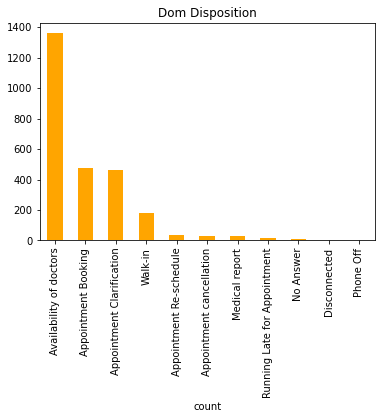

In [682]:
df_dom['Disposition'].value_counts().plot(kind='bar',color='orange');
plt.title('Dom Disposition')
plt.xlabel('count');

In [480]:
df_dom['Issue Category'].value_counts()

Inquiry        1336
Request        1222
Follow-up        28
Non-Contact      10
Feedback          9
Complaint         3
Name: Issue Category, dtype: int64

Most people called for inquiry and request while few called to complain and give feedback

Text(0, 0.5, 'count')

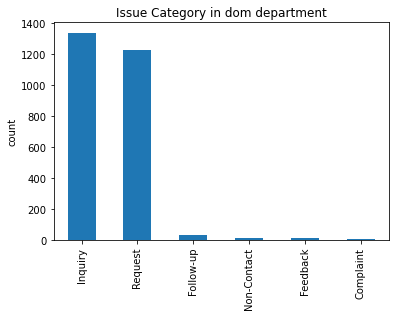

In [646]:
df_dom['Issue Category'].value_counts().plot(kind='bar');
plt.title('Issue Category in dom department')
plt.ylabel('count')

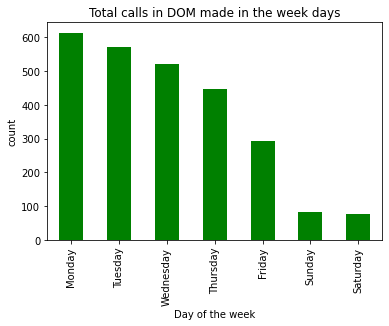

In [615]:
df_dom['day_of_the_week'].value_counts().plot(kind='bar',color='green')
plt.title('Total calls in DOM made in the week days')
plt.xlabel('Day of the week')
plt.ylabel('count')
plt.show()

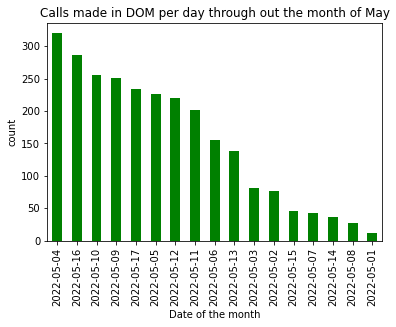

In [616]:
df_dom['day_of_the_month'].value_counts(sort = True).plot(kind='bar',color='green')
plt.title('Calls made in DOM per day through out the month of May')
plt.xlabel('Date of the month')
plt.ylabel('count')
plt.show()

## Issue Category

Dispositions within the issue category

In [485]:
df['Issue Category'].value_counts()

Request        5540
Inquiry        5353
Follow-up       162
Feedback         43
Non-Contact      41
Complaint        19
Name: Issue Category, dtype: int64

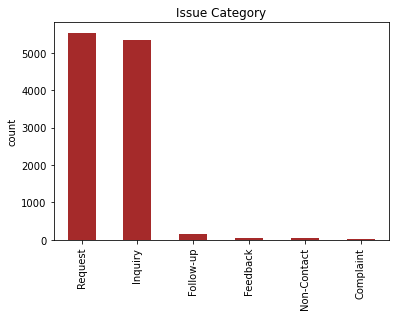

In [645]:
df['Issue Category'].value_counts().plot(kind='bar',color='brown');
plt.title('Issue Category')
plt.ylabel('count');

**There were complaints?!**

#### lets look at the complaints and know where they came from and directed to which department

In [536]:
df_issue_complaint = df[df['Issue Category']=='Complaint']

In [537]:
df_issue_complaint

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status,day_of_the_week,day_of_the_month
473,VB,Complaint,Service Available,OUTREACH,2 May 2022,Closed,Monday,2022-05-02
587,VB,Complaint,Availability of doctors,DOM,2 May 2022,Closed,Monday,2022-05-02
1036,VB,Complaint,Admission,Non-Ward,3 May 2022,Closed,Tuesday,2022-05-03
1088,VB,Complaint,Prescription,Pharm,3 May 2022,Closed,Tuesday,2022-05-03
2476,VB,Complaint,availability of drugs,Pharm,4 May 2022,Closed,Wednesday,2022-05-04
2545,VB,Complaint,Appointment Clarification,HAEMATO-ONCOLOGY,5 May 2022,Closed,Thursday,2022-05-05
5965,VB,Complaint,Appointment Booking,DOM,9 May 2022,Closed,Monday,2022-05-09
6508,VO,Complaint,Service Available,OUTREACH,10 May 2022,Closed,Tuesday,2022-05-10
6528,VB,Complaint,Service Available,OUTREACH,10 May 2022,Closed,Tuesday,2022-05-10
7112,VB,Complaint,Availability of doctors,Operation,10 May 2022,Closed,Tuesday,2022-05-10


In [538]:
df_issue_complaint['Department'].value_counts()

OUTREACH            6
DOM                 3
Non-Ward            3
Pharm               2
Operation           1
Non-Med             1
Paedi               1
OBS/GYNAE           1
HAEMATO-ONCOLOGY    1
Name: Department, dtype: int64

**OUTREACH department received most of the complains**

visual representation

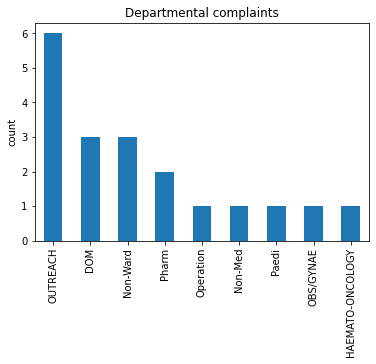

In [644]:
df_issue_complaint['Department'].value_counts().plot(kind = 'bar')
plt.title('Departmental complaints')
plt.ylabel('count');

Dates in which the complaints where made

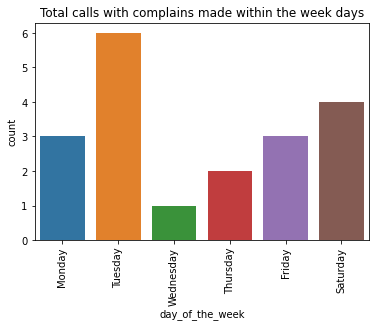

In [643]:
sns.countplot(x='day_of_the_week', data =df_issue_complaint)
plt.title('Total calls with complains made within the week days')
plt.xticks(rotation=90);

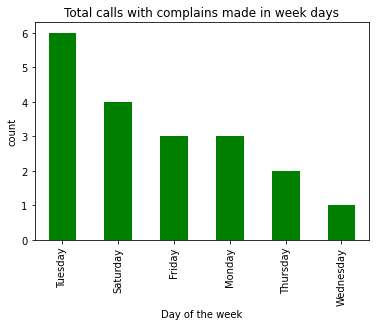

In [618]:
#sorted
df_issue_complaint['day_of_the_week'].value_counts().plot(kind='bar',color='green')
plt.title('Total calls with complains made in week days')
plt.xlabel('Day of the week')
plt.ylabel('count')
plt.show()

**most complains were made on Tuesdays**

No complains where made on sunday

**Date in which the complains where made**

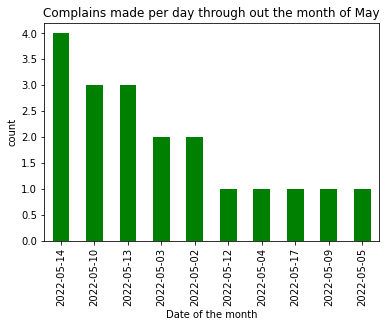

In [642]:
df_issue_complaint['day_of_the_month'].value_counts(sort = True).plot(kind='bar',color='green')
plt.title('Complains made per day through out the month of May')
plt.xlabel('Date of the month')
plt.ylabel('count')
plt.show()

most complaints where made on 14th 

lets see the disposition of the calls with complaints

In [498]:
df_issue_complaint['Disposition'].value_counts()

Service Available            6
Availability of doctors      4
Appointment Clarification    2
Discharge                    2
Housekeeping                 1
Prescription                 1
Appointment Booking          1
availability of drugs        1
Admission                    1
Name: Disposition, dtype: int64

**Most complains where about service availability and availability of doctors**

visual representation

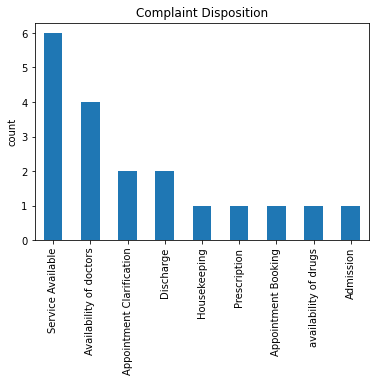

In [641]:
df_issue_complaint['Disposition'].value_counts().plot(kind='bar')
plt.title('Complaint Disposition')
plt.ylabel('count');

complaints issue source

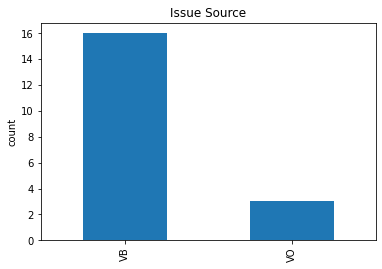

In [640]:
df_issue_complaint['Issue Source'].value_counts().plot(kind='bar')
plt.title('Issue Source')
plt.ylabel('count');

most complaints there sorce was VB

Ticket status of the complaint

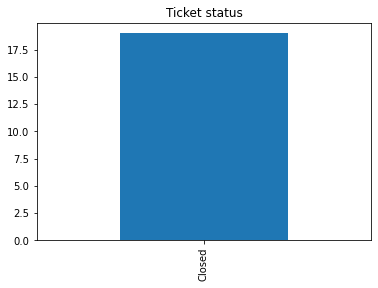

In [639]:
df_issue_complaint['Ticket Status'].value_counts().plot(kind='bar')
plt.title('Ticket status');

All complaints there tickets where closed

**Feedback**

**lets see departments that received feedback**

In [507]:
df_feedback = df[df['Issue Category']=='Feedback']

In [510]:
df_feedback.head()

,Issue Source,Issue Category,Disposition,Department,Date,Ticket Status,day_of_the_week,day_of_the_month
58,VO,Feedback,Prescription,Pharm,1 May 2022,Open,Sunday,2022-05-01
67,VB,Feedback,Walk-in,FMC,1 May 2022,Open,Sunday,2022-05-01
2429,VO,Feedback,Appointment Clarification,Paedi,4 May 2022,Closed,Wednesday,2022-05-04
2562,VO,Feedback,Availability of doctors,Operation,5 May 2022,Closed,Thursday,2022-05-05
3481,VO,Feedback,Appointment Clarification,OBS/GYNAE,5 May 2022,Closed,Thursday,2022-05-05


In [511]:
df_feedback['Department'].value_counts()

DOM              9
Operation        7
OBS/GYNAE        7
Paedi            4
Radio            3
OUTREACH         3
Pharm            2
LAB              2
CASUALTY         2
FMC              2
Non-Med          1
PHYSIOTHERAPY    1
Name: Department, dtype: int64

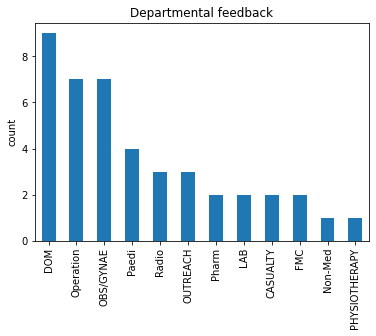

In [638]:
df_feedback['Department'].value_counts().plot(kind='bar')
plt.title('Departmental feedback')
plt.ylabel('count');

DOM, operation and OBS/GYNAE departments received most feedbacks

Which Dispositions gave most feedbacks

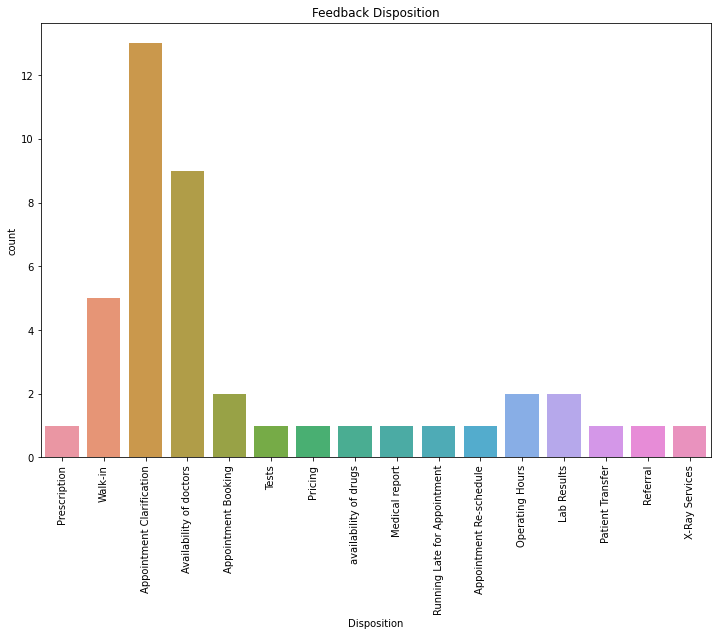

In [636]:
plt.figure(figsize=(12,8))
sns.countplot(x='Disposition',data = df_feedback)
plt.title('Feedback Disposition')
plt.xticks(rotation=90);

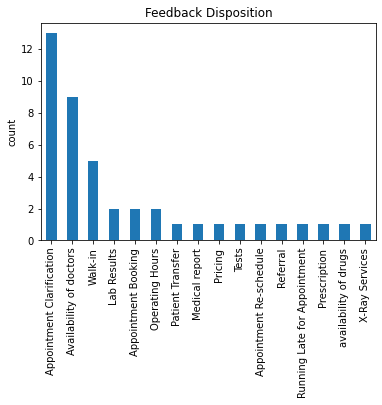

In [637]:
#sorted
df_feedback['Disposition'].value_counts().plot(kind='bar')
plt.title('Feedback Disposition')
plt.ylabel('count');

Most feedback came from dispositions about Appointment clarification and Availability of doctors

weekdays in which most feedbacks where made?

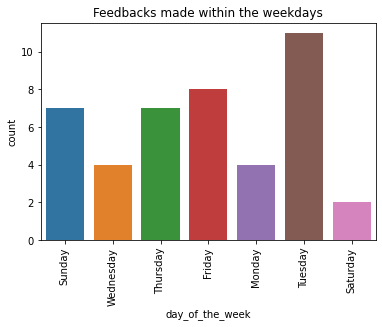

In [633]:
sns.countplot(x='day_of_the_week',data = df_feedback)
plt.title('Feedbacks made within the weekdays')
plt.xticks(rotation=90);

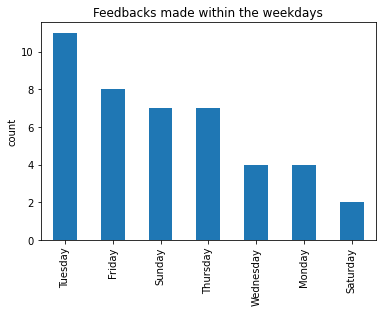

In [635]:
df_feedback['day_of_the_week'].value_counts().plot(kind='bar')
plt.title('Feedbacks made within the weekdays')
plt.ylabel('count');

Most Feedbacks where made on Tuesday

## Issue Source

In [549]:
df['Issue Source'].value_counts()

VB    9268
VO    1888
Em       1
SM       1
Name: Issue Source, dtype: int64

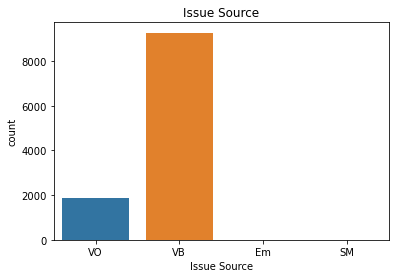

In [632]:
sns.countplot(x = 'Issue Source',data = df)
plt.title('Issue Source');

Most calls there issue source was VB

## Ticket Status

In [547]:
df['Ticket Status'].value_counts()

Closed        10905
Open            158
Resolved         73
Unresolved       22
Name: Ticket Status, dtype: int64

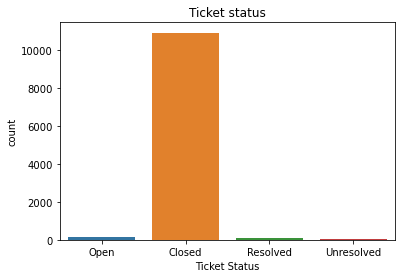

In [631]:
sns.countplot(x = 'Ticket Status',data = df)
plt.title('Ticket status');

Most tickets where closed. Meaning most cases where solved.

**lets analyze the open and unresolved ones**

**Open Tickets**

In [566]:
df_open_tickets = df[df['Ticket Status'] == 'Open']

Departments where tickets were open

In [568]:
df_open_tickets['Department'].value_counts()

LAB                29
Pharm              19
Radio              17
Non-Med            13
Non-Ward           12
DOM                12
OUTREACH           12
Operation          11
OBS/GYNAE           9
FINANCE             7
Paedi               6
CASUALTY            6
FMC                 3
HUMAN RESOURCE      1
FAMILY MEDICINE     1
Name: Department, dtype: int64

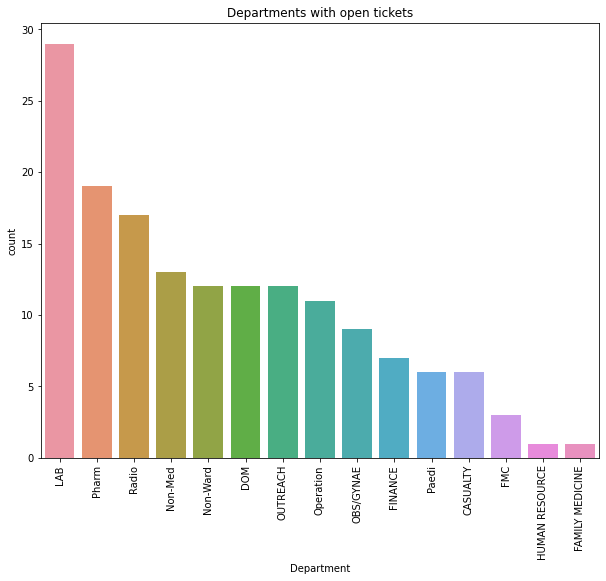

In [630]:
plt.figure(figsize=(10,8))
sns.countplot(x='Department',data = df_open_tickets, order = df_open_tickets['Department'].value_counts().index )
plt.title('Departments with open tickets')
plt.xticks(rotation=90);

lab, pharm, radio department had most open tickets

**Unresolved tickets**

In [548]:
df_unresolved_tickets = df[df['Ticket Status'] == 'Unresolved']

Departments with unresolved tickets?

In [550]:
df_unresolved_tickets['Department'].value_counts()

OBS/GYNAE           5
DOM                 4
Paedi               4
LAB                 2
PROCEDURES          1
Non-Med             1
FMC                 1
Operation           1
OUTREACH            1
PHYSIOTHERAPY       1
HAEMATO-ONCOLOGY    1
Name: Department, dtype: int64

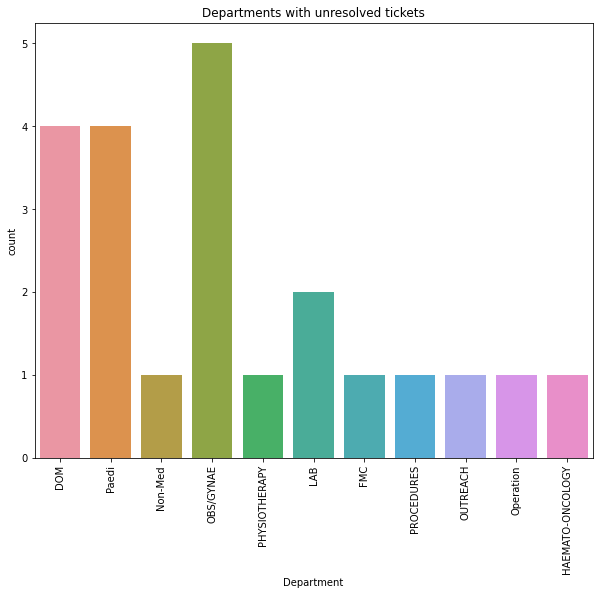

In [629]:
plt.figure(figsize=(10,8))
sns.countplot(x='Department',data = df_unresolved_tickets)
plt.title('Departments with unresolved tickets')
plt.xticks(rotation=90);

OBS/GYNAE department had Most unresolved tickets

Dispositions with unresolved tickets?

In [564]:
df_unresolved_tickets['Disposition'].value_counts()

Availability of doctors      11
Appointment Clarification     4
Appointment Booking           2
Tests                         2
Operating Hours               1
Housekeeping                  1
Pricing                       1
Name: Disposition, dtype: int64

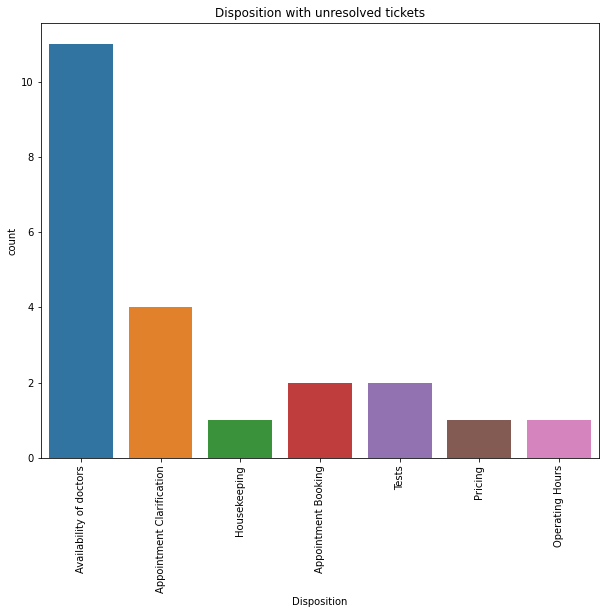

In [628]:
plt.figure(figsize=(10,8))
sns.countplot(x='Disposition',data = df_unresolved_tickets)
plt.title('Disposition with unresolved tickets')
plt.xticks(rotation=90);

Dispositions with unresolved tickets mostly where about Availability of Doctors

# More into Dispositions and Departments

Apppointment Clarification

In [621]:
df_appointment_inquiry = df[df['Disposition']=='Appointment Clarification']

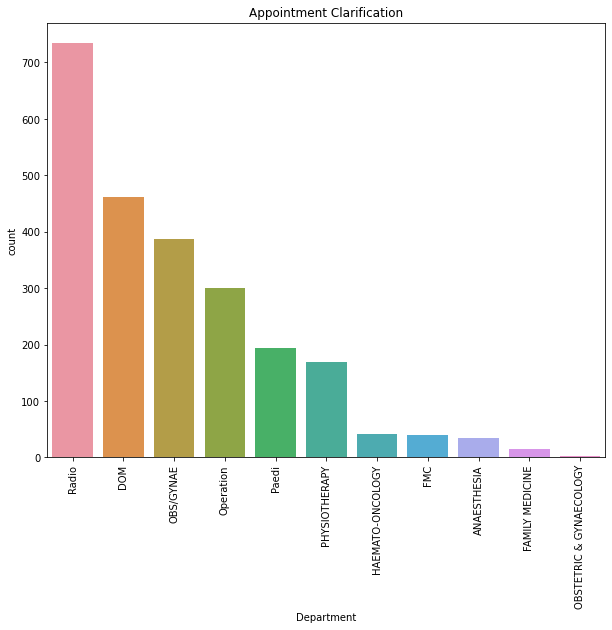

In [622]:
plt.figure(figsize=(10,8))
sns.countplot(x='Department',data = df_appointment_inquiry, order = df_appointment_inquiry['Department'].value_counts().index )
plt.title('Appointment Clarification')
plt.xticks(rotation=90);

Radio Department Received most appoint ment clarification

**Appointment Booking**

In [584]:
df_appointment_booking = df[df['Disposition']=='Appointment Booking']

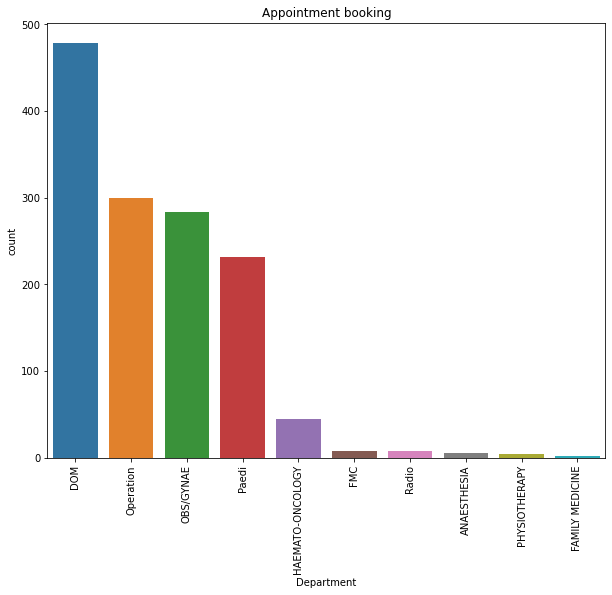

In [624]:
plt.figure(figsize=(10,8))
sns.countplot(x='Department',data = df_appointment_booking, order = df_appointment_booking['Department'].value_counts().index )
plt.title('Appointment booking')
plt.xticks(rotation=90);

DOM department received most appointment booking

**Service availability**

In [588]:
df_service = df[df['Disposition']=='Service Available']

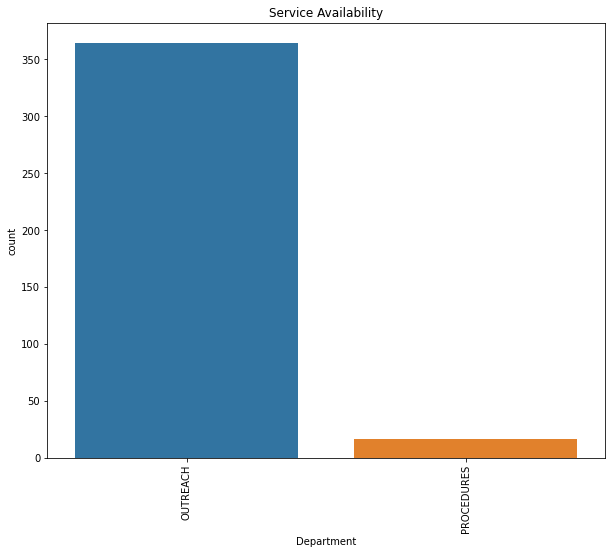

In [627]:
plt.figure(figsize=(10,8))
sns.countplot(x='Department',data = df_service, order = df_service['Department'].value_counts().index )
plt.title('Service Availability')
plt.xticks(rotation=90);

ONLY OUTREACH and  procedures department had calls seeking for service availability with outreach being the most

**Employee Welfare**

In [593]:
df_employee = df[df['Disposition']=='Employee Welfare']
df_employee['Department'].value_counts()

HUMAN RESOURCE    14
Name: Department, dtype: int64

Human rosurce department deals with employee welfare

**Availability of Beds**

In [596]:
df_bed = df[df['Disposition']=='Availability of beds']
df_bed['Department'].value_counts()

Non-Ward    20
Name: Department, dtype: int64

Non-Ward department deals with bed allocation issues

**Drug Availability**

In [598]:
df_drugs = df[df['Disposition']=='availability of drugs']
df_drugs['Department'].value_counts()

Pharm    241
Name: Department, dtype: int64

Pharm department deals with drug availability

**Recruitment**

In [626]:
df_recruitment = df[df['Disposition']=='Recruitment']
df_recruitment['Department'].value_counts()

HUMAN RESOURCE    32
Name: Department, dtype: int64

Human rosurce department also deals with Recruitment. for job inquiries it will be wise for one to contact hr department

# CONCLUSION

We managed to create new columns from the date column and see calls made within the month of may in weekdays and also per day

We managed to answer some questions, the dataset being from health domain we had to dive deep and ask questions like: 

Which departments gave no answer

Departments with unresolved tickets

which departments received feedbacks

Which day of the week in which most calls were made

*****